#### setup

In [76]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt

from func_e.FUNC_E import FUNC_E # import the class
import func_e.vocabs.all as vocabs

from math import sqrt

In [77]:
from matrix_class import ProteinMatrix
from matrix_class import SubMatrix
from cluster_class import AllClusters
from degreelist_class import DegreeList

In [78]:
from connected_components_utils import *
from analysis_utils import *

In [79]:
dream3_cluster_dict_file = "../data/results/DREAM-3-cc/d3_5_100.json-cluster.json"
dict_of_clusters = {}
# # convert actual cluster file to a dictionary!!
with open(dream3_cluster_dict_file,"r") as cluster_dict_file:
    dict_of_clusters = json.load(cluster_dict_file)

In [80]:
matrix, clusters, degreelist = initialize_matrix_clusters_degreelist("../data/networks/DREAM_files/dream_3.txt", "../data/results/DREAM-3-cc/d3_5_100.json-cluster.json")

In [81]:
genomic_background_filepath = '../data/testing_data/protein_list.txt'
all_go_terms = vocabs.getTerms(['GO'])
term_mapping_filepath = 'term_mapping.txt'
create_term_mapping_list('../data/go-results/dream_3_go_results.tsv', term_mapping_filepath)

#### Option 1: all clusters with > 3 proteins, all proteins that will connect > 3 components

step 1: find qualifying proteins and clusters

In [82]:
qualifying_clusters_1, qualifying_proteins_1 = find_clusters_and_proteins_together(matrix, clusters, degreelist, cluster_ratio=0, cluster_constant=3, min_components_that_protein_connects=3)

In [83]:
print(qualifying_clusters_1)
print(qualifying_proteins_1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198]
{0: ['MAPK3', 'CSNK2A1', 'MAPK1', 'SRC'], 4: ['ESR1', 'EGFR'], 6: ['BECN1', 'MAPK14', 'MAPK3', 'CSNK2A1'], 7: ['TS

step 1b: print qualifying clusters to a querylist

In [84]:
original_clusters_querylist_1 = 'og_querylist_1.txt'
updated_clusters_querylist_1 = 'new_querylist_1.txt'

In [85]:
# original:
print_querylist_of_clusters_to_file(clusters, qualifying_clusters_1,original_clusters_querylist_1)

# clusters with added proteins:
print_querylist_of_clusters_to_file(clusters, qualifying_clusters_1, updated_clusters_querylist_1, qualifying_proteins_1)

step 2: run functional enrichment

In [86]:
original_fe_1 = get_initialized_fe(genomic_background_filepath, term_mapping_filepath, termlist = all_go_terms)

updated_fe_1 = get_initialized_fe(genomic_background_filepath, term_mapping_filepath, termlist = all_go_terms)


In [87]:
original_fe_1.importFiles({'query': original_clusters_querylist_1 })
original_fe_1.run(cluster=False)

updated_fe_1.importFiles({'query': updated_clusters_querylist_1 })
updated_fe_1.run(cluster=False)

/Users/charlotte/miniconda3/envs/diamonds/lib/python3.10/site-packages/func_e/FUNC_E.py:279: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modResults = modResults.append({
/Users/charlotte/miniconda3/envs/diamonds/lib/python3.10/site-packages/func_e/FUNC_E.py:279: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modResults = modResults.append({
/Users/charlotte/miniconda3/envs/diamonds/lib/python3.10/site-packages/func_e/FUNC_E.py:279: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modResults = modResults.append({
/Users/charlotte/miniconda3/envs/diamonds/lib/python3.10/site-packages/func_e/FUNC_E.py:279: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

step 3: from functional enrichment, assemble data/p-values 

step 3a: get original and updated pvals

In [88]:
original_df_1 = original_fe_1.enrichment[['Module', 'Term', 'Fishers_pvalue']].copy()
original_df_1['Module'] = original_df_1['Module'] + ' ' + original_df_1['Term']
original_df_1.drop('Term', axis=1, inplace=True)

In [89]:
original_df_1

,Module,Fishers_pvalue
0,cluster_0 GO:0000724,0.004074
1,cluster_0 GO:0008157,0.00765
2,cluster_0 GO:0010165,0.00765
3,cluster_1 GO:0007416,0.001082
4,cluster_100 GO:0000086,0.005169
...,...,...
400,cluster_95 GO:0043666,0.006632
401,cluster_96 GO:0005179,0.001872
402,cluster_98 GO:0007156,0.006058
403,cluster_99 GO:0018105,0.006975


In [90]:
updated_df_1 = updated_fe_1.enrichment[['Module', 'Term', 'Fishers_pvalue']].copy()

updated_df_1['Module'] = updated_df_1['Module'] + ' ' + updated_df_1['Term']
updated_df_1.drop('Term', axis=1, inplace=True)
updated_df_1.rename(columns = {'Fishers_pvalue':'Updated_Fishers_pvalue'}, inplace = True)

step 3b: combine into a single dataframe

In [91]:
results_df_1 = pd.merge(original_df_1, updated_df_1, on=['Module'], how='outer')

step 4: display results in a graph

#### Option 1 Results:

<AxesSubplot:xlabel='Module'>

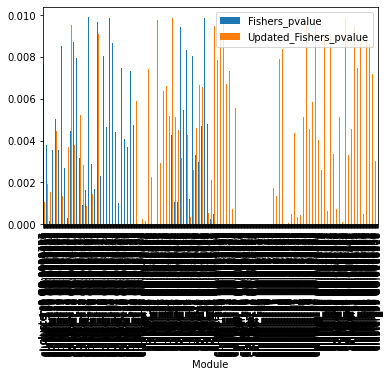

In [92]:
results_df_1.plot(x="Module", y=["Fishers_pvalue", "Updated_Fishers_pvalue"], kind="bar")

step 4b: do some analysis on the results
> count number of significant p-vals for both new and updated clusters

In [93]:
results_df_1['Fishers_pvalue'].count()

405

In [94]:
results_df_1['Updated_Fishers_pvalue'].count()

663

note that the updated clusters have a larger number of significant p-values

> count number of unique clusters that are functionally enriched now

In [95]:
original_fe_1.enrichment['Module'].nunique()

155

In [96]:
updated_fe_1.enrichment['Module'].nunique()

162

notice that now 162 / 199 clusters are functionally enriched

#### Results for 1b: only showing results for clusters that were updated

##### analysis

In [97]:
original_clusters_querylist_1b = 'og_querylist_1b.txt'
updated_clusters_querylist_1b = 'new_querylist_1b.txt'

# original:
print_querylist_of_clusters_to_file(clusters, qualifying_proteins_1.keys(),original_clusters_querylist_1b)

# clusters with added proteins:
print_querylist_of_clusters_to_file(clusters, qualifying_proteins_1.keys(), updated_clusters_querylist_1b, qualifying_proteins_1)

In [98]:
original_fe_1b = get_initialized_fe(genomic_background_filepath, term_mapping_filepath, termlist = all_go_terms)

updated_fe_1b = get_initialized_fe(genomic_background_filepath, term_mapping_filepath, termlist = all_go_terms)

original_fe_1b.importFiles({'query': original_clusters_querylist_1b })
original_fe_1b.run(cluster=False)

updated_fe_1b.importFiles({'query': updated_clusters_querylist_1b })
updated_fe_1b.run(cluster=False)

/Users/charlotte/miniconda3/envs/diamonds/lib/python3.10/site-packages/func_e/FUNC_E.py:279: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modResults = modResults.append({
/Users/charlotte/miniconda3/envs/diamonds/lib/python3.10/site-packages/func_e/FUNC_E.py:279: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modResults = modResults.append({
/Users/charlotte/miniconda3/envs/diamonds/lib/python3.10/site-packages/func_e/FUNC_E.py:279: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modResults = modResults.append({
/Users/charlotte/miniconda3/envs/diamonds/lib/python3.10/site-packages/func_e/FUNC_E.py:279: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

In [99]:
# original:
original_df_1b = original_fe_1b.enrichment[['Module', 'Term', 'Fishers_pvalue']].copy()
original_df_1b['Module'] = original_df_1b['Module'] + ' ' + original_df_1b['Term']
original_df_1b.drop('Term', axis=1, inplace=True)

# clusters with added proteins:
updated_df_1b = updated_fe_1b.enrichment[['Module', 'Term', 'Fishers_pvalue']].copy()

updated_df_1b['Module'] = updated_df_1b['Module'] + ' ' + updated_df_1b['Term']
updated_df_1b.drop('Term', axis=1, inplace=True)
updated_df_1b.rename(columns = {'Fishers_pvalue':'Updated_Fishers_pvalue'}, inplace = True)

# combine into a single df:
results_df_1b = pd.merge(original_df_1b, updated_df_1b, on=['Module'], how='outer')

##### results

<AxesSubplot:xlabel='Module'>

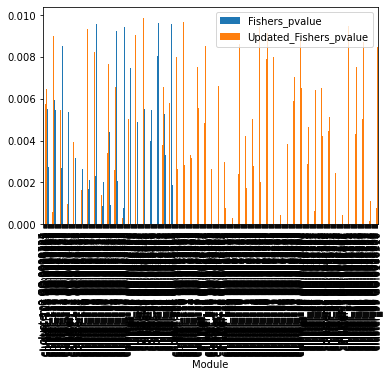

In [100]:
results_df_1b.plot(x="Module", y=["Fishers_pvalue", "Updated_Fishers_pvalue"], kind="bar")

In [101]:
print(f"all values for only clusters that were updated:")
print(f"number of clusters that were updated: {len(qualifying_proteins_1.keys())}\n")


print(f"number of significant pvals in original clusters: {results_df_1b['Fishers_pvalue'].count()}")
print(f"number of significant pvals in updated clusters: {results_df_1b['Updated_Fishers_pvalue'].count()}\n")

print(f"number of clusters that were functionally enriched: {original_fe_1b.enrichment['Module'].nunique()}")
print(f"number of clusters that were functionally enriched after being updated: {updated_fe_1b.enrichment['Module'].nunique()}")

all values for only clusters that were updated:
number of clusters that were updated: 94

number of significant pvals in original clusters: 244
number of significant pvals in updated clusters: 502

number of clusters that were functionally enriched: 84
number of clusters that were functionally enriched after being updated: 91


#### Option 2: clusters with > 3 proteins, all proteins that will connect at least the square root of all the components in the clusters

will have to make a new function that does square root:

TODO: eventually will have to modify the og function to just have a use_sqrt T/F bool

In [102]:
def qualifying_proteins_using_sqrt_and_submatrix(cluster_num: int, submatrix: SubMatrix, clusters: AllClusters, degreelist: DegreeList, min_components_that_protein_connects: int = -1, max_degree: int = 500) -> list():
    """
    TODO : a revised version of the find_proteins_that_match_criteria function that takes in a submatrix as a parameter, and therefore doesn't need to construct one. 
    TODO: this function converts the square root to a float
    """
    if (min_components_that_protein_connects == -1):
            min_components_that_protein_connects = int(sqrt(len(clusters.get_cluster_proteins(cluster_num))))
        
    num_components, labels = submatrix.get_num_components_and_labels()

    ### POPULATE COMPONENT DICTIONARY ###
    component_dictionary = dict() # protein : component_num
    j = 0
    for array in [(np.array(submatrix.get_list_of_proteins())[np.nonzero(labels == i)]) for i in range(num_components)]:
        for protein in array:
            component_dictionary[protein] = j
        j += 1
    
    ## FIND CONNECTED PROTEINS AND DETERMINE IF THEY QUALIFY 
    qualifying_proteins = list()

    for protein in (degreelist.get_list_of_proteins_sorted_by_degree()):   
        num_edges, which_proteins = degreelist.determine_num_edges_to_cluster(protein, clusters.get_cluster_proteins(cluster_num), also_return_which_proteins=True)
                
        if (num_edges >= min_components_that_protein_connects):
            set_of_components_that_protein_connects = degreelist.which_components_of_a_cluster_would_a_protein_connect(protein, clusters.get_cluster_proteins(cluster_num), component_dictionary, connected_proteins_within_cluster=which_proteins)

            if len(set_of_components_that_protein_connects) >= min_components_that_protein_connects:
                qualifying_proteins.append(protein)

    return qualifying_proteins

In [103]:
def find_clusters_and_sqrt_proteins_together(matrix: ProteinMatrix, clusters: AllClusters, degreelist: DegreeList, cluster_ratio: float = .5, cluster_constant: int = 0, find_clusters_that_are_MORE_connected: bool = False, max_degree: int = 500) -> list() and dict():
    """
    TODO
    """
    
    cluster_nums_that_qualify = list()
    qualifying_proteins_dict = dict()

    for cluster_num in clusters.get_all_clusters():
        # create a submatrix out of the proteins in the cluster
        submatrix = SubMatrix(clusters.get_cluster_proteins(cluster_num), matrix)
        num_components, labels = submatrix.get_num_components_and_labels()
        # print(f"num components is {num_components}. num proteins is {len(submatrix.get_list_of_proteins())}")
        if (num_components >= (cluster_ratio * len(submatrix.get_list_of_proteins()) + cluster_constant)) != find_clusters_that_are_MORE_connected:

            # add cluster to list showing that it qualifies, 
            cluster_nums_that_qualify.append(cluster_num)

            # then do analysis on the cluster -> create a list of qualifying proteins
            qualifying_proteins = qualifying_proteins_using_sqrt_and_submatrix(cluster_num, submatrix, clusters, degreelist, max_degree=max_degree)

            if qualifying_proteins: # not empty
                qualifying_proteins_dict[cluster_num] = qualifying_proteins
            


    return cluster_nums_that_qualify, qualifying_proteins_dict

find qualifying clusters/proteins

In [104]:
qualifying_clusters_2, qualifying_proteins_2 = find_clusters_and_sqrt_proteins_together(matrix, clusters, degreelist, cluster_ratio=0, cluster_constant=3)

In [105]:
print(qualifying_clusters_2)
print(qualifying_proteins_2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198]
{10: ['NOTCH1'], 11: ['PRKACA'], 20: ['CHEK1', 'ATM'], 25: ['SRC'], 26: ['PRKACA'], 27: ['ATM'], 28: ['TGFBR2'], 3

In [106]:
original_clusters_querylist_2 = 'og_querylist_2.txt'
updated_clusters_querylist_2 = 'new_querylist_2.txt'

In [107]:
# original:
print_querylist_of_clusters_to_file(clusters, qualifying_clusters_2,original_clusters_querylist_2)

# clusters with added proteins:
print_querylist_of_clusters_to_file(clusters, qualifying_clusters_2, updated_clusters_querylist_2, qualifying_proteins_2)

step 2: run functional enrichment

In [108]:
original_fe_2 = get_initialized_fe(genomic_background_filepath, term_mapping_filepath, termlist = all_go_terms)

updated_fe_2 = get_initialized_fe(genomic_background_filepath, term_mapping_filepath, termlist = all_go_terms)

original_fe_2.importFiles({'query': original_clusters_querylist_2 })
original_fe_2.run(cluster=False)

updated_fe_2.importFiles({'query': updated_clusters_querylist_2 })
updated_fe_2.run(cluster=False)

/Users/charlotte/miniconda3/envs/diamonds/lib/python3.10/site-packages/func_e/FUNC_E.py:279: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modResults = modResults.append({
/Users/charlotte/miniconda3/envs/diamonds/lib/python3.10/site-packages/func_e/FUNC_E.py:279: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modResults = modResults.append({
/Users/charlotte/miniconda3/envs/diamonds/lib/python3.10/site-packages/func_e/FUNC_E.py:279: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modResults = modResults.append({
/Users/charlotte/miniconda3/envs/diamonds/lib/python3.10/site-packages/func_e/FUNC_E.py:279: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

step 3: from functional enrichment, assemble data/p-values 

In [109]:
# original:
original_df_2 = original_fe_2.enrichment[['Module', 'Term', 'Fishers_pvalue']].copy()
original_df_2['Module'] = original_df_2['Module'] + ' ' + original_df_2['Term']
original_df_2.drop('Term', axis=1, inplace=True)

# clusters with added proteins:
updated_df_2 = updated_fe_2.enrichment[['Module', 'Term', 'Fishers_pvalue']].copy()

updated_df_2['Module'] = updated_df_2['Module'] + ' ' + updated_df_2['Term']
updated_df_2.drop('Term', axis=1, inplace=True)
updated_df_2.rename(columns = {'Fishers_pvalue':'Updated_Fishers_pvalue'}, inplace = True)

# combine into a single df:
results_df_2 = pd.merge(original_df_2, updated_df_2, on=['Module'], how='outer')

step 4: display results in a graph

#### Option 2 Results:

<AxesSubplot:xlabel='Module'>

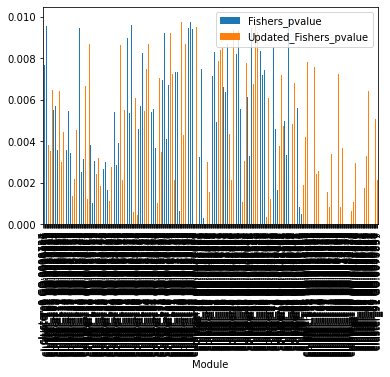

In [110]:
results_df_2.plot(x="Module", y=["Fishers_pvalue", "Updated_Fishers_pvalue"], kind="bar")

In [111]:
print(f"number of significant pvals in original clusters: {results_df_2['Fishers_pvalue'].count()}")
print(f"number of significant pvals in updated clusters: {results_df_2['Updated_Fishers_pvalue'].count()}\n")

print(f"number of clusters that were updated: {len(qualifying_proteins_2.keys())}")
print(f"number of clusters that were functionally enriched: {original_fe_2.enrichment['Module'].nunique()}")
print(f"number of clusters that were functionally enriched after being updated: {updated_fe_2.enrichment['Module'].nunique()}")

number of significant pvals in original clusters: 405
number of significant pvals in updated clusters: 479

number of clusters that were updated: 52
number of clusters that were functionally enriched: 155
number of clusters that were functionally enriched after being updated: 163


#### results for only updated clusters (2b):

##### analysis:

In [112]:
original_clusters_querylist_2b = 'og_querylist_2b.txt'
updated_clusters_querylist_2b = 'new_querylist_2b.txt'

# original:
print_querylist_of_clusters_to_file(clusters, qualifying_proteins_2.keys(),original_clusters_querylist_2b)

# clusters with added proteins:
print_querylist_of_clusters_to_file(clusters, qualifying_proteins_2.keys(), updated_clusters_querylist_2b, qualifying_proteins_2)

In [113]:
original_fe_2b = get_initialized_fe(genomic_background_filepath, term_mapping_filepath, termlist = all_go_terms)

updated_fe_2b = get_initialized_fe(genomic_background_filepath, term_mapping_filepath, termlist = all_go_terms)

original_fe_2b.importFiles({'query': original_clusters_querylist_2b })
original_fe_2b.run(cluster=False)

updated_fe_2b.importFiles({'query': updated_clusters_querylist_2b })
updated_fe_2b.run(cluster=False)

/Users/charlotte/miniconda3/envs/diamonds/lib/python3.10/site-packages/func_e/FUNC_E.py:279: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modResults = modResults.append({
/Users/charlotte/miniconda3/envs/diamonds/lib/python3.10/site-packages/func_e/FUNC_E.py:279: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modResults = modResults.append({
/Users/charlotte/miniconda3/envs/diamonds/lib/python3.10/site-packages/func_e/FUNC_E.py:279: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modResults = modResults.append({
/Users/charlotte/miniconda3/envs/diamonds/lib/python3.10/site-packages/func_e/FUNC_E.py:279: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

In [114]:
# original:
original_df_2b = original_fe_2b.enrichment[['Module', 'Term', 'Fishers_pvalue']].copy()
original_df_2b['Module'] = original_df_2b['Module'] + ' ' + original_df_2b['Term']
original_df_2b.drop('Term', axis=1, inplace=True)

# clusters with added proteins:
updated_df_2b = updated_fe_2b.enrichment[['Module', 'Term', 'Fishers_pvalue']].copy()

updated_df_2b['Module'] = updated_df_2b['Module'] + ' ' + updated_df_2b['Term']
updated_df_2b.drop('Term', axis=1, inplace=True)
updated_df_2b.rename(columns = {'Fishers_pvalue':'Updated_Fishers_pvalue'}, inplace = True)

# combine into a single df:
results_df_2b = pd.merge(original_df_2b, updated_df_2b, on=['Module'], how='outer')

##### results

<AxesSubplot:xlabel='Module'>

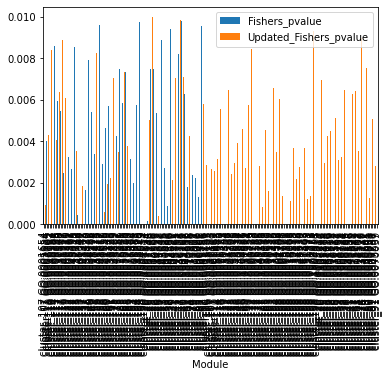

In [115]:
results_df_2b.plot(x="Module", y=["Fishers_pvalue", "Updated_Fishers_pvalue"], kind="bar")

In [116]:
print(f"all values for only clusters that were updated:")
print(f"number of clusters that were updated: {len(qualifying_proteins_2.keys())}\n")


print(f"number of significant pvals in original clusters: {results_df_2b['Fishers_pvalue'].count()}")
print(f"number of significant pvals in updated clusters: {results_df_2b['Updated_Fishers_pvalue'].count()}\n")

print(f"number of clusters that were functionally enriched: {original_fe_2b.enrichment['Module'].nunique()}")
print(f"number of clusters that were functionally enriched after being updated: {updated_fe_2b.enrichment['Module'].nunique()}")

all values for only clusters that were updated:
number of clusters that were updated: 52

number of significant pvals in original clusters: 105
number of significant pvals in updated clusters: 179

number of clusters that were functionally enriched: 40
number of clusters that were functionally enriched after being updated: 48


#### results when only 1 protein is added (2c): <br>
note: this protein is of the lowest degree

In [117]:
qualifying_proteins_2c = dict()
for key in qualifying_proteins_2:
    qualifying_proteins_2c[key] = [qualifying_proteins_2[key][0]]


In [118]:
original_clusters_querylist_2c = 'og_querylist_2c.txt'
updated_clusters_querylist_2c = 'new_querylist_2c.txt'

# original:
print_querylist_of_clusters_to_file(clusters, qualifying_proteins_2c.keys(),original_clusters_querylist_2c)

# clusters with added proteins:
print_querylist_of_clusters_to_file(clusters, qualifying_proteins_2.keys(), updated_clusters_querylist_2c, qualifying_proteins_2c)

In [119]:
original_fe_2c = get_initialized_fe(genomic_background_filepath, term_mapping_filepath, termlist = all_go_terms)

updated_fe_2c = get_initialized_fe(genomic_background_filepath, term_mapping_filepath, termlist = all_go_terms)

original_fe_2c.importFiles({'query': original_clusters_querylist_2c })
original_fe_2c.run(cluster=False)

updated_fe_2c.importFiles({'query': updated_clusters_querylist_2c })
updated_fe_2c.run(cluster=False)

/Users/charlotte/miniconda3/envs/diamonds/lib/python3.10/site-packages/func_e/FUNC_E.py:279: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modResults = modResults.append({
/Users/charlotte/miniconda3/envs/diamonds/lib/python3.10/site-packages/func_e/FUNC_E.py:279: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modResults = modResults.append({
/Users/charlotte/miniconda3/envs/diamonds/lib/python3.10/site-packages/func_e/FUNC_E.py:279: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modResults = modResults.append({
/Users/charlotte/miniconda3/envs/diamonds/lib/python3.10/site-packages/func_e/FUNC_E.py:279: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

In [120]:
# original:
original_df_2c = original_fe_2c.enrichment[['Module', 'Term', 'Fishers_pvalue']].copy()
original_df_2c['Module'] = original_df_2c['Module'] + ' ' + original_df_2c['Term']
original_df_2c.drop('Term', axis=1, inplace=True)

# clusters with added proteins:
updated_df_2c = updated_fe_2c.enrichment[['Module', 'Term', 'Fishers_pvalue']].copy()

updated_df_2c['Module'] = updated_df_2c['Module'] + ' ' + updated_df_2c['Term']
updated_df_2c.drop('Term', axis=1, inplace=True)
updated_df_2c.rename(columns = {'Fishers_pvalue':'Updated_Fishers_pvalue'}, inplace = True)

# combine into a single df:
results_df_2c = pd.merge(original_df_2c, updated_df_2c, on=['Module'], how='outer')

#### results:

<AxesSubplot:xlabel='Module'>

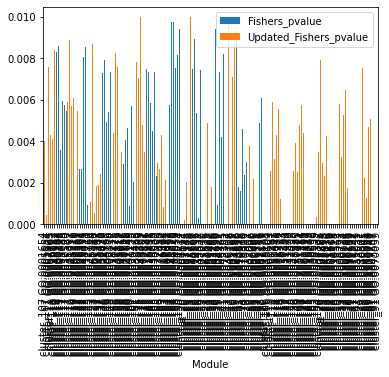

In [121]:
results_df_2c.plot(x="Module", y=["Fishers_pvalue", "Updated_Fishers_pvalue"], kind="bar")

In [122]:
print(f"all values for only clusters that were updated:")
print(f"number of clusters that were updated: {len(qualifying_proteins_2c.keys())}\n")

print(f"number of significant pvals in original clusters: {results_df_2c['Fishers_pvalue'].count()}")
print(f"number of significant pvals in updated clusters: {results_df_2c['Updated_Fishers_pvalue'].count()}\n")

print(f"number of clusters that were functionally enriched: {original_fe_2c.enrichment['Module'].nunique()}")
print(f"number of clusters that were functionally enriched after being updated: {updated_fe_2c.enrichment['Module'].nunique()}")

all values for only clusters that were updated:
number of clusters that were updated: 52

number of significant pvals in original clusters: 105
number of significant pvals in updated clusters: 131

number of clusters that were functionally enriched: 40
number of clusters that were functionally enriched after being updated: 46


note that values don't look as good when only 1 protein is added